# **Logistic Regression**

In this notebook, we will perform a logistic regression model which is an effective classification model, we will perform this model with two differents penaltys the l1 y l2 to check which one will made better perform and at the end we will show the results with a confusion matrix. 

First we import the neccesary libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### EDA and Feature Engineering


For this project we will be using the dataset food_items.csv which is located in this same repository, which contains detailed nutrition information about food items for people with diabetes. The objective is to classify whether a diabetic patient should choose More Often, Less Often, or In Moderation for a specific food item based on the nutrition information in the dataset.

First, let's load the dataset as a Pandas dataframe.

In [2]:
food_df = pd.read_csv('food_items.csv')
food_df.head()
# food_df.shape #(13260, 19)

,Unnamed: 0,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
1,1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
2,2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
3,3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
4,4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0,'In Moderation'


Now let's see more information about our features.

In [3]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13260 entries, 0 to 13259
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           13260 non-null  int64  
 1   Calories             13260 non-null  float64
 2   Total Fat            13260 non-null  int64  
 3   Saturated Fat        13260 non-null  float64
 4   Monounsaturated Fat  13260 non-null  float64
 5   Polyunsaturated Fat  13260 non-null  float64
 6   Trans Fat            13260 non-null  float64
 7   Cholesterol          13260 non-null  int64  
 8   Sodium               13260 non-null  float64
 9   Total Carbohydrate   13260 non-null  float64
 10  Dietary Fiber        13260 non-null  float64
 11  Sugars               13260 non-null  float64
 12  Sugar Alcohol        13260 non-null  int64  
 13  Protein              13260 non-null  float64
 14  Vitamin A            13260 non-null  int64  
 15  Vitamin C            13260 non-null 

Above we can see, we have 18 features and we have only 1 object variable which is our target varible. 

We can also obtain descriptive statistics about our features:

In [4]:
food_df.iloc[:, :-1].describe()

,Unnamed: 0,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
count,13260.00000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000,13260.000000
mean,6629.50000,133.861086,4.475264,1.450617,0.338069,0.254660,0.047459,8.857692,241.867142,18.232020,1.602971,6.645234,0.117949,4.661333,6.287632,6.741855,5.175264,5.235671
std,3827.97662,94.227650,5.386340,2.410318,1.345852,2.230586,0.321402,20.976530,272.284363,14.786316,3.363879,8.328465,1.121529,5.611143,18.374191,23.785100,8.779637,9.119459
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3314.75000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,6629.50000,120.000000,3.000000,0.500000,0.000000,0.000000,0.000000,0.000000,135.000000,17.000000,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,2.000000,2.000000
75%,9944.25000,180.000000,7.000000,2.000000,0.000000,0.000000,0.000000,10.000000,370.000000,27.000000,2.000000,11.000000,0.000000,7.000000,6.000000,2.000000,6.000000,8.000000
max,13259.00000,2210.000000,43.000000,22.000000,40.000000,235.000000,11.000000,450.000000,2431.000000,270.000000,305.000000,115.000000,31.000000,70.000000,622.000000,1000.000000,110.000000,170.000000


Above we can see that this dataset contains 17 nutrient categories about each food item. These categories include Calories, Total Fat, Protein, Sugar, etc., and are listed as numeric variables. As such, we only need to scale them for training our logistic regression model so that we can compare our feature coefficients directly.

We also can see an extra column called "Unnamed: 0" which is just an index already contained in the dataset, we will discuss it later. 

Next, let's check the target variable in the class column to see the label values and their distribution.


In [5]:
# # Get the row entries with the last col 'class'
food_df.iloc[:, -1:].value_counts(normalize=True)
# food_df['class'].unique()

class          
'In Moderation'    0.501433
'Less Often'       0.423906
'More Often'       0.074661
dtype: float64

From de above output we can see there's an imbalance in the categories. Let's see a plot of the categories of the class column.

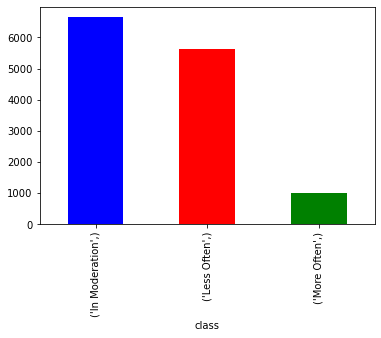

In [6]:
food_df.iloc[:, -1:].value_counts().plot.bar(color=['blue', 'red', 'green'])

As we can see from the bar chart above, the three categories are imbalancedm, most food items are in the In Moderation and Less Often categories. This makes diabetes diet management very hard, so we could build a machine learning model to help patients choose their food. Then we have three labels meaning our logistic regression model will be multinomial with three classes.

A multinomial logistic regression is a generalized logistic regression model which generates a probability distribution over all classes.

### Feature Engineering

Now you should have some basic understanding about the food dataset. Next, let's process the raw dataset and construct input data `X` and label/output `y` for logistic regression model training.


In [7]:
columns = [i for i in food_df.columns if i != 'class' and i != 'Unnamed: 0']
X_raw = food_df[columns]
y_raw = food_df['class']
print(X_raw.shape, y_raw.shape)

(13260, 17) (13260,)


We got rid of the column called 'Unnamed: 0' which is just an index that was already in the dataset.

Fortunately, all feature columns are numeric so we just need to scale them.

First we create a MinMaxScaler object and then we scale the raw input features.

In [8]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X_raw)

For the target variable y(y_raw), let's encode its three class values.

First we create a LabelEncoder object

In [9]:
label_encoder = LabelEncoder()

We encode the target variable

In [10]:
y = label_encoder.fit_transform(y_raw.values.ravel())
# y[0:300]

Now we can see that the encoded target variable will only contain values 0=In Moderation, 1=Less Often, 2=More Often.


In [11]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([6649, 5621,  990], dtype=int64))

### Train logistic regression models


First, let's split the training and testing dataset. 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 420)

Now that we have the training and testing datasets ready, let's start with the training model.

We first define a LogisticRegression model with the following arguments.

In [13]:
# L2 penalty to shrink coefficients without removing any features from the model
penalty= 'l2'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use lbfgs for L2 penalty and multinomial classes
solver = 'lbfgs'
# Max iteration = 1000
max_iter = 1000

Now we define a logistic regresion model with above arguments.

In [14]:
l2_model = LogisticRegression(random_state=420, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)

Now let's fit the model.

In [15]:
l2_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=420)

Now we predict the values with the X_test set.

In [16]:
l2_preds = l2_model.predict(X_test)

In [17]:
#We see some predicts
l2_preds[0:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 2, 0])

Nowlet's make a function to see some hyper parameters like "accuracy, recall, precision and f1score".

In [18]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [19]:
evaluate_metrics(y_test, l2_preds) 

{'accuracy': 0.7794117647058824,
 'recall': array([0.86917293, 0.74911032, 0.34848485]),
 'precision': array([0.73865815, 0.83697813, 0.85185185]),
 'f1score': array([0.79861831, 0.79061033, 0.49462366])}

As we can see from  the above outputs, the logistic regression model has relatively good performance on this multinomial classification task. 

The overall accuracy is around 0.77 and the f1score is around 0.8. Note that for recall, precision, and f1score, we output the values for each class to see how the model performs on an individual class. 

And, we can see from the results, the recall for class=2 (More often) is not very good. 

Now, let's try defining another logistic regression model with l1 penality this time, to see if our classification performance would be improved.

In [20]:
#We define the next varibles
penalty= 'l1'
multi_class = 'multinomial'
solver = 'saga'
max_iter = 1000

Then we define the logistic regression model with above arguments using l1 penality and after we fit the model.

In [21]:
l1_model = LogisticRegression(random_state=420, penalty=penalty, multi_class=multi_class, solver=solver, max_iter = 1000)
l1_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='l1',
                   random_state=420, solver='saga')

We make predictions the predictions with the test set.

In [22]:
l1_preds = l1_model.predict(X_test) 
l1_preds[0:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 2, 0])

We can also check the class probability distribution using the predict_proba function. For example, we want to see the probabilities the first instance in the test dataset:


In [23]:
odd_ratios = l1_model.predict_proba(X_test[:1, :])[0]
odd_ratios

array([0.69034247, 0.26902046, 0.04063707])

We can see that  Class 0 has the largest probability 0.69. As such, the model prediction for this instance will be class 0 and this is the same as the `predict` method.


In [24]:
l1_model.predict(X_test[:1, :])[0]

0

Now given the true labels y_test and predictions, we can evaluate the model performance by calling our function defined before.

In [25]:
evaluate_metrics(y_test, l1_preds)

{'accuracy': 0.8095776772247361,
 'recall': array([0.8443609 , 0.75622776, 0.87878788]),
 'precision': array([0.79476292, 0.83415113, 0.79090909]),
 'f1score': array([0.81881152, 0.79328045, 0.83253589])}

Now, we can see this logistic regression with l1 penalty has much better performance in general than l2. 

One possible reason is that l1 penalty may remove some correlated feature variables by shrinking their coefficents to zero. 

As such, the model is much simplified to avoid overfitting on the training data and better aligned with the logistic regression assumption that all features should be independent.


### Confusion Matrix


Now we will plot the confusion matrix based on the last output and we will visualize it using a heatmap method.

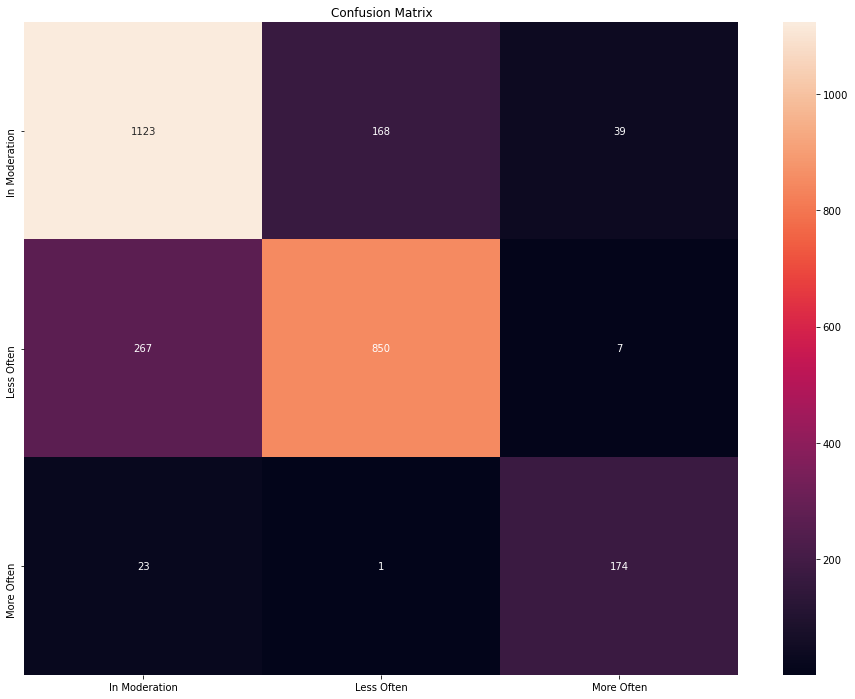

In [26]:
cf = confusion_matrix(y_test, l1_preds)
plt.figure(figsize=(16, 12))
ax = sns.heatmap(cf, annot=True, fmt="d", xticklabels=["In Moderation", "Less Often", "More Often"], 
                 yticklabels=["In Moderation", "Less Often", "More Often"])
ax.set(title="Confusion Matrix");

As we can see on the above confusion matrix output, the diagonal representing the cases where the model predicted true positives (TP), for example for the 'in moderation' case the 1330 model correctly predicted that 1123 were in fact 'in moderation' and incorrectly predicted that 168 were 'less likely' and also predicted 39 in the 'more often' category which is also incorrect and since they are the majority it is considered a good classification model. 